## Problem Statement

Forecast about the stock price 

### Importing Liabraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#reading Dataset

sbi = pd.read_csv(r"C:\Users\hp\Downloads\SBI_Historical_Data_.csv")
sbi

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%
...,...,...,...,...,...,...,...
1380,"Jan 07, 2015",300.15,300.00,302.55,295.15,15.05M,0.08%
1381,"Jan 06, 2015",299.90,310.00,311.10,298.70,15.33M,-4.11%
1382,"Jan 05, 2015",312.75,316.25,316.80,312.10,9.14M,-0.79%
1383,"Jan 02, 2015",315.25,314.35,318.30,314.35,9.94M,0.40%


# Performing EDA

In [12]:
#checking dimension of the data

sbi.shape

(1385, 7)

In [13]:
#data head

sbi.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [14]:
#data dtypes and counts

sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


In [15]:
#analysing statistical summary of data

sbi.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75,0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Price,1385.0,266.274404,45.555277,150.85,158.584,180.58,189.18,245.65,270.80,296.15,319.64,333.74,360.050,372.40
Open,1385.0,266.903213,45.590664,151.95,158.872,181.65,190.20,245.90,271.15,296.50,319.96,334.94,358.828,371.95
High,1385.0,270.343682,45.829745,153.20,163.572,184.44,193.88,248.80,274.60,300.75,324.48,337.95,363.160,373.80
Low,1385.0,262.757906,45.248334,148.25,155.284,178.02,186.02,242.55,267.40,292.20,315.40,330.77,355.390,366.20


In [16]:
#converting Date

sbi["Date"]=pd.to_datetime(sbi["Date"])

In [17]:
#after converting date checking datatypes

sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [18]:
#checking null values 

sbi.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [19]:
#sorting date for time series

sbi = sbi.sort_values('Date')

In [20]:
sbi

,Date,Price,Open,High,Low,Vol.,Change %
1384,2015-01-01,314.00,312.45,315.00,310.70,6.14M,0.69%
1383,2015-01-02,315.25,314.35,318.30,314.35,9.94M,0.40%
1382,2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%
1381,2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%
1380,2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%
...,...,...,...,...,...,...,...
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%


In [21]:
#indexing the dataset with date

sbi = sbi.set_index('Date')

In [22]:
#dropping unrequired columns

sbi.drop(columns=['Open','High','Low','Vol.','Change %'],axis= 1, inplace= True)

In [23]:
sbi

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15
...,...
2020-08-03,192.25
2020-08-04,191.60
2020-08-05,191.45


In [24]:
#coverting into series

y= sbi.Price

In [25]:
#checking type of data

type(y)

pandas.core.series.Series

In [26]:
#converting dataset on weekly basis

train =sbi['Price'].resample('w').mean()
train

Date
2015-01-04    314.625
2015-01-11    304.170
2015-01-18    310.530
2015-01-25    321.920
2015-02-01    325.150
               ...   
2020-07-12    192.650
2020-07-19    187.400
2020-07-26    193.470
2020-08-02    189.160
2020-08-09    191.380
Freq: W-SUN, Name: Price, Length: 293, dtype: float64

# Performing Time series Analysis

<AxesSubplot:xlabel='Date'>

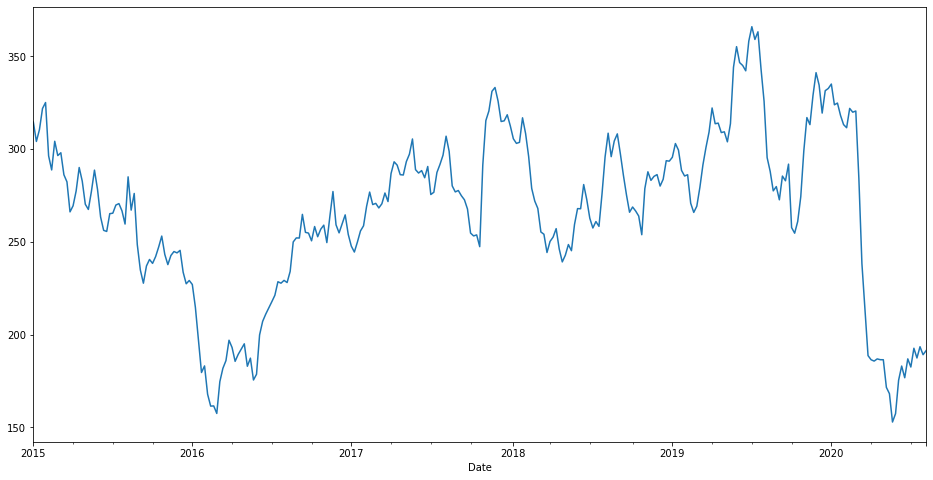

In [27]:
#Visualising time series data

plt.figure(figsize=(16,8))
train.plot()

# adfuller Test

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(train)

(-2.480140728559254,
 0.12038137232289109,
 1,
 291,
 {'1%': -3.4530232710482367,
  '5%': -2.871523926671883,
  '10%': -2.5720897694878424},
 2072.8686693141253)

In [30]:
adfuller(np.log(train))

(-2.49551769166978,
 0.11656873141815,
 2,
 290,
 {'1%': -3.453102162983312,
  '5%': -2.871558538275452,
  '10%': -2.5721082282996433},
 -988.7920798885903)

In [31]:
adfuller(np.log(train).diff(5).dropna())

(-4.634921551882676,
 0.00011132084473946615,
 16,
 271,
 {'1%': -3.4547128138328875,
  '5%': -2.8722649771800155,
  '10%': -2.5724850011573914},
 -904.2297819985247)

# Performing Decomposing

In [32]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition

In [33]:
decompose = seasonal_decompose(train, model='additive', two_sided=False, extrapolate_trend=4)

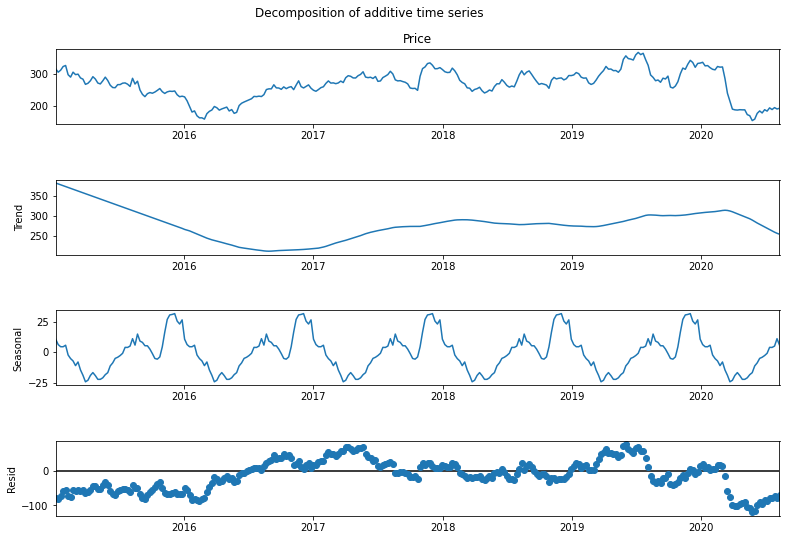

In [34]:
fig = decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [35]:
pd.DataFrame([decompose.seasonal, decompose.trend, decompose.resid, decompose.observed]).T

,seasonal,trend,resid,Price
Date,,,,
2015-01-04,10.606837,382.099080,-78.080917,314.625
2015-01-11,6.164193,379.888186,-81.882379,304.170
2015-01-18,4.416602,377.677292,-71.563894,310.530
2015-01-25,4.405565,375.466397,-57.951963,321.920
2015-02-01,5.649192,373.255503,-53.754695,325.150
...,...,...,...,...
2020-07-12,3.898834,266.320946,-77.569780,192.650
2020-07-19,3.839432,263.028638,-79.468070,187.400
2020-07-26,4.946039,259.896619,-71.372658,193.470


In [36]:
#checking tail of the data

train.tail(21)

Date
2020-03-22    213.440000
2020-03-29    188.680000
2020-04-05    186.450000
2020-04-12    185.716667
2020-04-19    186.900000
2020-04-26    186.480000
2020-05-03    186.450000
2020-05-10    171.550000
2020-05-17    168.160000
2020-05-24    152.860000
2020-05-31    157.375000
2020-06-07    175.410000
2020-06-14    183.050000
2020-06-21    176.740000
2020-06-28    186.920000
2020-07-05    182.530000
2020-07-12    192.650000
2020-07-19    187.400000
2020-07-26    193.470000
2020-08-02    189.160000
2020-08-09    191.380000
Freq: W-SUN, Name: Price, dtype: float64

In [37]:
#splitting data into train and test 

train_1 = train[:'2020-03-29']
test = train['2020-03-22':]

In [38]:
#log of train and test

log_train = np.log(train_1)
log_test = np.log(test)

In [39]:
log_train.shape

(274,)

In [40]:
log_test.shape

(21,)

# Parameter Selection 

In [41]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [42]:
best_results = auto_arima(log_train,  p=range(0, 3), d=range(1,5), q=range(0, 3),
                         P=range(0, 2), D=range(0, 2), Q=range(0, 2))

Best SARIMAXNonexNone12 model - AIC:inf


AttributeError: 'NoneType' object has no attribute 'summary'

# Fitting Model

In [43]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(log_train, order = (0,1,1), seasonal_order= (0,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [44]:
#validiating Forecast

fcat1=model.forecast(21)

In [45]:
#antilog

fcast = np.exp(model.forecast(21))

In [46]:
test

Date
2020-03-22    213.440000
2020-03-29    188.680000
2020-04-05    186.450000
2020-04-12    185.716667
2020-04-19    186.900000
2020-04-26    186.480000
2020-05-03    186.450000
2020-05-10    171.550000
2020-05-17    168.160000
2020-05-24    152.860000
2020-05-31    157.375000
2020-06-07    175.410000
2020-06-14    183.050000
2020-06-21    176.740000
2020-06-28    186.920000
2020-07-05    182.530000
2020-07-12    192.650000
2020-07-19    187.400000
2020-07-26    193.470000
2020-08-02    189.160000
2020-08-09    191.380000
Freq: W-SUN, Name: Price, dtype: float64

# Calculating MSE and RMSE

In [47]:
print("MSE", np.mean(np.square(test-fcast)))

MSE 131.9872928886584


In [48]:
print("RMSE", np.sqrt(np.mean(np.square(test-fcast))))

RMSE 11.488572273727419
